In [1]:
# mount your google drive
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# Q1.3

In [2]:
import cv2
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import filters
from scipy import spatial

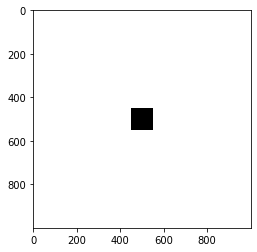

In [3]:
img = np.zeros([1000,1000,3],dtype=np.uint8)
img.fill(255) 
img[450:550, 450:550] = [0, 0, 0]
plt.imshow(img, interpolation='nearest')
plt.show()

184


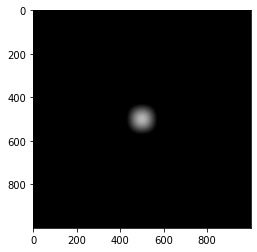

In [4]:
def LoG(sigma):
    n = 1000 # filter size
    y,x = np.ogrid[-n//2:n//2+1,-n//2:n//2+1]
    y_filter = np.exp(-(y*y/(2.*sigma*sigma)))
    x_filter = np.exp(-(x*x/(2.*sigma*sigma)))
    final_filter = (1/(np.pi*sigma**2))*((x*x + y*y)/(2*sigma**2)-1) *  (x_filter*y_filter)
    return final_filter

sigma = 40
filter_log = LoG(sigma) #filter generation
laplacian = cv2.filter2D(img,-1,filter_log) # convolving image
print(np.amax(abs(laplacian)))
plt.imshow(laplacian)
plt.show()

# Q3

In [10]:
import skimage.io, skimage.color
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import matplotlib

In [11]:
def calculate_gradient(img, template):
    ts = template.size \
    new_img = np.zeros((img.shape[0]+ts-1, 
                           img.shape[1]+ts-1))
    new_img[np.uint16((ts-1)/2.0):img.shape[0]+np.uint16((ts-1)/2.0), 
            np.uint16((ts-1)/2.0):img.shape[1]+np.uint16((ts-1)/2.0)] = img
    result = np.zeros((new_img.shape))
    
    for r in np.uint16(np.arange((ts-1)/2.0, img.shape[0]+(ts-1)/2.0)):
        for c in np.uint16(np.arange((ts-1)/2.0, 
                              img.shape[1]+(ts-1)/2.0)):
            curr_region = new_img[r-np.uint16((ts-1)/2.0):r+np.uint16((ts-1)/2.0)+1, 
                                  c-np.uint16((ts-1)/2.0):c+np.uint16((ts-1)/2.0)+1]
            curr_result = curr_region * template
            score = np.sum(curr_result)
            result[r, c] = score
    result_img = result[np.uint16((ts-1)/2.0):result.shape[0]-np.uint16((ts-1)/2.0), 
                        np.uint16((ts-1)/2.0):result.shape[1]-np.uint16((ts-1)/2.0)]
    return result_img

def gradient_magnitude(horizontal_gradient, vertical_gradient):
    horizontal_gradient_square = np.power(horizontal_gradient, 2)
    vertical_gradient_square = np.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = np.sqrt(sum_squares)
    return grad_magnitude

def gradient_direction(horizontal_gradient, vertical_gradient):
    grad_direction = np.arctan(vertical_gradient/(horizontal_gradient+0.00000001))
    grad_direction = np.rad2deg(grad_direction)
    grad_direction = grad_direction%180
    return grad_direction

def check_angle(angle):
  # return the corresponding bin number of the angle
  if angle < 15 or angle > 165:
    return 0
  if angle >= 15 and angle < 45:
    return 1
  if angle >= 45 and angle < 75:
    return 2
  if angle >= 75 and angle < 105:
    return 3
  if angle >= 105 and angle < 135:
    return 4
  if angle >= 135 and angle < 165:
    return 5
    
def accumulated_gradient(grad_direction, grad_magnitude):
  res = np.zeros(6)
  for i in range(cell_size):
    for j in range(cell_size):
      index = check_angle(grad_direction[i][j])
      res[index] += grad_magnitude[i][j]
  return res

def cell_count(grad_direction_cell):
  res = np.zeros(6)
  for i in range(8):
    for j in range(8):
      index = check_angle(grad_direction_cell[i][j])
      res[index] += 1
  return res

def visualize(img, grid, is_normalize):
  bin1 = np.zeros((grid.shape[0], grid.shape[1]))
  bin2 = np.zeros((grid.shape[0], grid.shape[1]))
  bin3 = np.zeros((grid.shape[0], grid.shape[1]))
  bin4 = np.zeros((grid.shape[0], grid.shape[1]))
  bin5 = np.zeros((grid.shape[0], grid.shape[1]))
  bin6 = np.zeros((grid.shape[0], grid.shape[1]))
  
  for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
      if not is_normalize:
        bin1[i][j] = grid[i][j][0]
        bin2[i][j] = grid[i][j][1]
        bin3[i][j] = grid[i][j][2]
        bin4[i][j] = grid[i][j][3]
        bin5[i][j] = grid[i][j][4]
        bin6[i][j] = grid[i][j][5]
      else:
        bin1[i][j] = grid[i][j][0] + grid[i][j][6] + grid[i][j][12] + grid[i][j][18]
        bin2[i][j] = grid[i][j][1] + grid[i][j][7] + grid[i][j][13] + grid[i][j][19]
        bin3[i][j] = grid[i][j][2] + grid[i][j][8] + grid[i][j][14] + grid[i][j][20]
        bin4[i][j] = grid[i][j][3] + grid[i][j][9] + grid[i][j][15] + grid[i][j][21]
        bin5[i][j] = grid[i][j][4] + grid[i][j][10] + grid[i][j][16] + grid[i][j][22]
        bin6[i][j] = grid[i][j][5] + grid[i][j][11] + grid[i][j][17] + grid[i][j][23]

  # x = np.linspace(-0,225,grid.shape[1])
  # y = np.linspace(-10,276,grid.shape[0])
  x = np.linspace(0,grid.shape[1]*cell_length,grid.shape[1])
  y = np.linspace(0,grid.shape[0]*cell_length,grid.shape[0])
  X, Y = np.meshgrid(x, y)
  plt.imshow(img, cmap=matplotlib.cm.gray)
  plt.quiver(X, Y, bin1*math.sin(math.radians(0)), bin1*math.cos(math.radians(0)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')
  plt.quiver(X, Y, bin2*math.sin(math.radians(30)), bin2*math.cos(math.radians(30)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')
  plt.quiver(X, Y, bin3*math.sin(math.radians(60)), bin3*math.cos(math.radians(60)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')
  plt.quiver(X, Y, bin4*math.sin(math.radians(90)), bin4*math.cos(math.radians(90)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')
  plt.quiver(X, Y, bin5*math.sin(math.radians(120)), bin5*math.cos(math.radians(120)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')
  plt.quiver(X, Y, bin6*math.sin(math.radians(150)), bin6*math.cos(math.radians(150)), headwidth=0, headlength=0, color='red', width=0.003, pivot='middle')

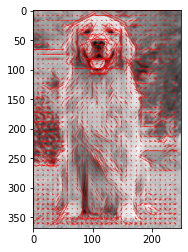

In [26]:
img = cv2.imread("/content/drive/My Drive/3.jpg", cv2.IMREAD_GRAYSCALE)
horizontal_mask = np.array([-1, 0, 1])
vertical_mask = np.array([[-1],
                             [0],
                             [1]])

horizontal_gradient = calculate_gradient(img, horizontal_mask)
vertical_gradient = calculate_gradient(img, vertical_mask)

grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)
threshold = 10
for i in range(grad_magnitude.shape[0]):
  for j in range(grad_magnitude.shape[1]):
    if grad_magnitude[i][j] < threshold:
      grad_magnitude[i][j] = 0

grad_direction = grad_direction % 180
hist_bins = np.array([15,45,75,105,135,165])
cell_size = 8
cell_length = 8
grid = np.zeros((img.shape[0]//cell_length - 1, img.shape[1]//cell_length - 1, 6))
for i in range(img.shape[0]//cell_length - 1):
  for j in range(img.shape[1]//cell_length - 1):
    cell_direction = grad_direction[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    cell_magnitude = grad_magnitude[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    # HOG_cell_hist = HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)
    HOG_cell_hist = accumulated_gradient(cell_direction, cell_magnitude)
    grid[i][j] = HOG_cell_hist

visualize(img,grid, False)

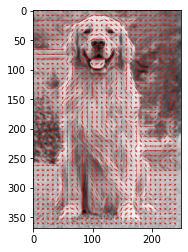

In [27]:
grid2 = np.zeros((img.shape[0]//cell_length - 1, img.shape[1]//cell_length - 1, 6))
for i in range(img.shape[0]//cell_length - 1):
  for j in range(img.shape[1]//cell_length - 1):
    cell_direction = grad_direction[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    cell_direction_count= cell_count(cell_direction)
    grid2[i][j][0]+= cell_direction_count[0]
    grid2[i][j][1]+= cell_direction_count[1]
    grid2[i][j][2]+= cell_direction_count[2]
    grid2[i][j][3]+= cell_direction_count[3]
    grid2[i][j][4]+= cell_direction_count[4]
    grid2[i][j][5]+= cell_direction_count[5]

visualize(img, grid2, False)

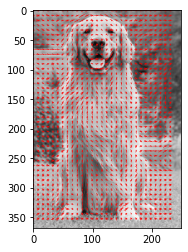

In [28]:
def normalize(grid):
  normalized_hog = np.zeros((grid.shape[0]-1, grid.shape[1]-1, 24))
  for i in range(grid.shape[0] - 1):
    for j in range(grid.shape[1] - 1):
      entries = list(grid[i][j]) + list(grid[i+1][j]) + list(grid[i][j+1]) + list(grid[i+1][j+1])
      for entry_index in range(len(entries)):
          entries[entry_index] = entries[entry_index]/((sum(np.array(entries)**2)+0.001**2)**0.5)
      normalized_hog[i][j] = entries
  return normalized_hog

def save_to_txt(txt_name, histo):
  histo = histo.reshape((histo.shape[0]*histo.shape[1],  histo.shape[2]))
  np.savetxt(txt_name, histo)
save_to_txt("/content/drive/My Drive/3.txt", normalize(grid))
visualize(img, normalize(grid), True)

In [29]:
img2 = cv2.imread("/content/drive/My Drive/BA-without flash.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("/content/drive/My Drive/BA-with flash.jpg", cv2.IMREAD_GRAYSCALE)

In [30]:
res2 = cv2.resize(img2, dsize=(230, 286), interpolation=cv2.INTER_CUBIC)
res3 = cv2.resize(img3, dsize=(230, 286), interpolation=cv2.INTER_CUBIC)

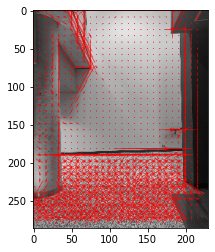

In [32]:
horizontal_gradient2 = calculate_gradient(res2, horizontal_mask)
vertical_gradient2 = calculate_gradient(res2, vertical_mask)

grad_magnitude2 = gradient_magnitude(horizontal_gradient2, vertical_gradient2)
grad_direction2 = gradient_direction(horizontal_gradient2, vertical_gradient2)
for i in range(grad_magnitude2.shape[0]):
  for j in range(grad_magnitude2.shape[1]):
    if grad_magnitude2[i][j] < threshold:
      grad_magnitude2[i][j] = 0

grad_direction2 = grad_direction2 % 180
grid3 = np.zeros((res2.shape[0]//cell_length - 1, res2.shape[1]//cell_length - 1, 6))
for i in range(res2.shape[0]//cell_length - 1):
  for j in range(res2.shape[1]//cell_length - 1):
    cell_direction2 = grad_direction2[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    cell_magnitude2 = grad_magnitude2[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    HOG_cell_hist2 = accumulated_gradient(cell_direction2, cell_magnitude2)
    grid3[i][j] = HOG_cell_hist2

visualize(res2, grid3, False)

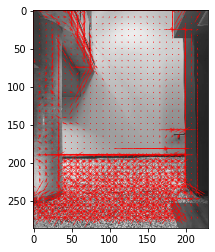

In [33]:
horizontal_gradient3 = calculate_gradient(res3, horizontal_mask)
vertical_gradient3 = calculate_gradient(res3, vertical_mask)

grad_magnitude3 = gradient_magnitude(horizontal_gradient3, vertical_gradient3)
grad_direction3 = gradient_direction(horizontal_gradient3, vertical_gradient3)
for i in range(grad_magnitude3.shape[0]):
  for j in range(grad_magnitude3.shape[1]):
    if grad_magnitude3[i][j] < threshold:
      grad_magnitude3[i][j] = 0

grad_direction3 = grad_direction3 % 180
grid4 = np.zeros((res3.shape[0]//cell_length - 1, res3.shape[1]//cell_length - 1, 6))
for i in range(res3.shape[0]//cell_length - 1):
  for j in range(res3.shape[1]//cell_length - 1):
    cell_direction3 = grad_direction2[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    cell_magnitude3 = grad_magnitude2[i*cell_length:(i+1)*cell_length, j*cell_length:(j+1)*cell_length]
    HOG_cell_hist3 = accumulated_gradient(cell_direction3, cell_magnitude3)
    grid4[i][j] = HOG_cell_hist3

visualize(res3, grid4, False)

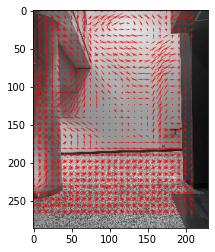

In [34]:
save_to_txt("/content/drive/My Drive/BA-without flash.txt", normalize(grid3))
visualize(res2, normalize(grid3), True)

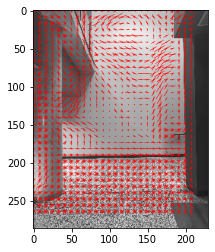

In [35]:
save_to_txt("/content/drive/My Drive/BA-with flash.txt", normalize(grid4))
visualize(res3, normalize(grid4), True)

# Q4

In [50]:
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2
import math
from PIL import Image
from numpy import linalg as la

In [37]:
img4 = cv2.imread("/content/drive/My Drive/Sandford_Fleming_Building_2011_Toronto.jpg")
img5 = cv2.imread("/content/drive/My Drive/Uoft_SF-01.jpg")

In [51]:
def SecondMomentMatrix(image, window):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray,(5,5),7)
    Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
    Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)

    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)

    lambda0 = np.zeros(gray.shape)
    lambda1 = np.zeros(gray.shape)
    for x in range(image.shape[0] - window.shape[0]):
        for y in range(image.shape[1] - window.shape[1]):
            #calculate every M matrix
            M_matrix = [[0, 0], [0, 0]]
            for m in range(window.shape[0]):
                for n in range(window.shape[1]):
                    temp_matrix = np.array([[Ix2_blur[x+m][y+n], IxIy_blur[x+m][y+n]], [IxIy_blur[x+m][y+n], Iy2_blur[x+m][y+n]]])
                    M_matrix += window[m][n] * temp_matrix
            #find the eigenvalues:
            eigvals, eigvecs = la.eig(M_matrix)
            eigvals = eigvals.real
            lambda0[x][y] = eigvals[0]
            lambda1[x][y] = eigvals[1]
    return lambda0, lambda1

def gkern(w, l, sig):
    """
    parameters:
    w: width of the filter matrix
    l: length of the filter matrix
    sig: scale
    Return 2D guassian matrix with widthw and length l, scale sig.
    """
    # Return number of l evenly spaced numbers over the ientrval represents w and l in formula
    w = np.linspace(-(w-1), w-1, w)
    l = np.linspace(-(l-1), l-1, l)

    # create saparate filter of w and l
    gauss_w = np.exp(-np.square(w)/ np.square(sig)) * math.sqrt((2*math.pi*np.square(sig)))
    gauss_l = np.exp(-np.square(l)/ np.square(sig)) * math.sqrt((2*math.pi*np.square(sig)))

    # multiply two part together to get gaussian filter 
    gauss = np.outer(gauss_w, gauss_l)
    return gauss / np.sum(gauss)

In [52]:
#Generate a Gaussian kernel with sigma = 1
kernel1 = gkern(3,3,1)
#for image4:
lam0_img4_k1, lam1_img4_k1 = SecondMomentMatrix(img4, kernel1)
#for image5:
lam0_img5_k1, lam1_img5_k1 = SecondMomentMatrix(img5, kernel1)

Text(0, 0.5, 'lambda2_k1')

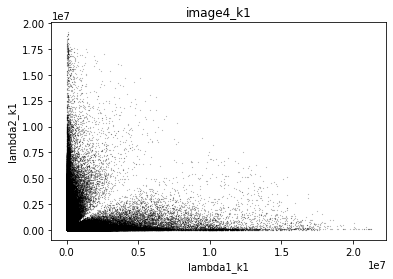

In [41]:
plt.scatter(lam0_img4_k1, lam1_img4_k1, c='black', s=0.01)
plt.title("image4_k1")
plt.xlabel("lambda1_k1")
plt.ylabel("lambda2_k1")

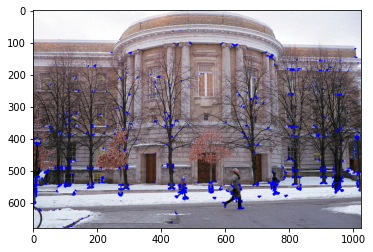

In [42]:
mylist_k1 = []
for i in range(679):
  inside = []
  for j in range(1024):
    minimum = min(lam0_img4_k1[i][j], lam1_img4_k1[i][j])
    inside.append(minimum)
  mylist_k1.append(inside)
mat_k1 = np.array(mylist_k1)
img4_temp_k1 = img4.copy()
img4_temp_k1[mat_k1>500000]=[0,0,255]
plt.imshow(img4_temp_k1)

Text(0, 0.5, 'lambda2_k1')

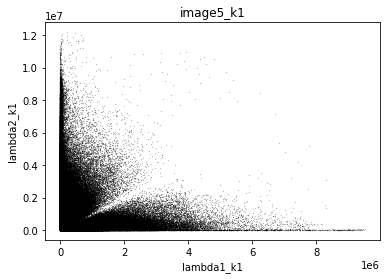

In [43]:
plt.scatter(lam0_img5_k1, lam1_img5_k1, c='black', s=0.01)
plt.title("image5_k1")
plt.xlabel("lambda1_k1")
plt.ylabel("lambda2_k1")

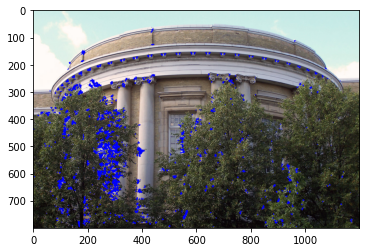

In [44]:
mylist2_k1 = []
for i in range(800):
  inside = []
  for j in range(1200):
    minimum = min(lam0_img5_k1[i][j], lam1_img5_k1[i][j])
    inside.append(minimum)
  mylist2_k1.append(inside)
mat2_k1 = np.array(mylist2_k1)
img5_temp_k1 = img5.copy()
img5_temp_k1[mat2_k1>500000]=[0,0,255]
plt.imshow(img5_temp_k1)

In [45]:
#Generate a Gaussian kernel with sigma = 100000
kernel2 = gkern(3,3,100000)
#for image1:
lam0_img4_k2, lam1_img4_k2 = SecondMomentMatrix(img4, kernel2)
#for image2:
lam0_img5_k2, lam1_img5_k2 = SecondMomentMatrix(img5, kernel2)

Text(0, 0.5, 'lambda2_k2')

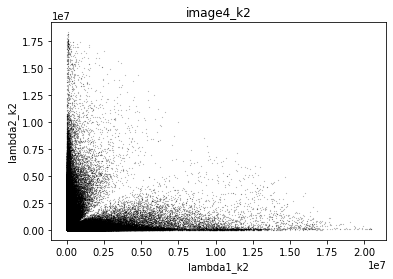

In [46]:
plt.scatter(lam0_img4_k2, lam1_img4_k2, c='black', s=0.01)
plt.title("image4_k2")
plt.xlabel("lambda1_k2")
plt.ylabel("lambda2_k2")

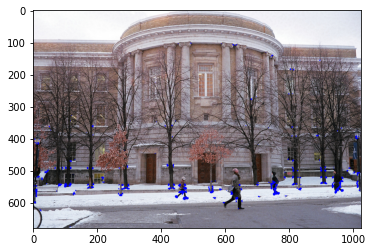

In [47]:
mylist_k2 = []
for i in range(679):
  inside = []
  for j in range(1024):
    minimum = min(lam0_img4_k2[i][j], lam1_img4_k2[i][j])
    inside.append(minimum)
  mylist_k2.append(inside)
mat_k2 = np.array(mylist_k2)
img4_temp_k2 = img4.copy()
img4_temp_k2[mat_k2>1000000]=[0,0,255]
plt.imshow(img4_temp_k2)

Text(0, 0.5, 'lambda2_k1')

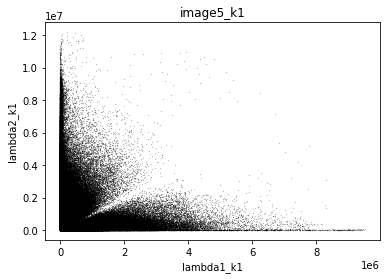

In [48]:
plt.scatter(lam0_img5_k1, lam1_img5_k1, c='black', s=0.01)
plt.title("image5_k1")
plt.xlabel("lambda1_k1")
plt.ylabel("lambda2_k1")

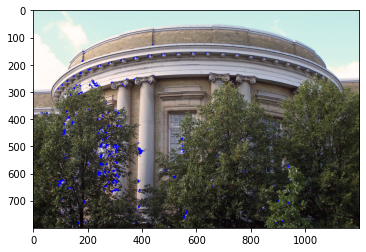

In [49]:
mylist2_k2 = []
for i in range(800):
  inside = []
  for j in range(1200):
    minimum = min(lam0_img5_k2[i][j], lam1_img5_k2[i][j])
    inside.append(minimum)
  mylist2_k2.append(inside)
mat2_k2 = np.array(mylist2_k2)
img5_temp_k2 = img5.copy()
img5_temp_k2[mat2_k2>1000000]=[0,0,255]
plt.imshow(img5_temp_k2)